In [3]:
!pip install pandas tqdm


     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.5 MB 8.0 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/11.5 MB 8.9 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.5 MB 10.6 MB/s eta 0:00:01
   ------ --------------------------------- 1.8/11.5 MB 10.6 MB/s eta 0:00:01
   ------- -------------------------------- 2.2/11.5 MB 10.2 MB/s eta 0:00:01
   --------- ------------------------------ 2.7/11.5 MB 10.0 MB/s eta 0:00:01
   ---------- ----------------------------- 3.1/11.5 MB 9.9 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/11.5 MB 9.8 MB/s eta 0:00:01
   ---

In [10]:
!pip install matplotlib

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -------------------------------- ----- 143.4/165.5 kB 4.3 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 9.6 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/8.0 MB 9.9 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/8.0 MB 9.3 MB/s eta 0:00:01
   -------- ------------------------------- 1.7/8.0 MB 9.0 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.0 MB 8.9 MB/s eta 0:00:01
   ------------ --------------------------- 2.5/8.0 MB 9.2 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.0 MB 9.3 MB/s eta 0:00:01
   ---------------- ----------------------- 3.3/8.0 MB 9.2 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.0 MB 9.2 MB/s eta 0:00:01
   -----------

In [12]:
!pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 991.0 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00


In [29]:
!pip install selenium

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   - -------------------------------------- 0.4/9.5 MB 8.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/9.5 MB 10.4 MB/s eta 0:00:01
   ----- ---------------------------------- 1.3/9.5 MB 10.4 MB/s eta 0:00:01
   ------- -------------------------------- 1.8/9.5 MB 10.3 MB/s eta 0:00:01
   --------- ------------------------------ 2.3/9.5 MB 10.4 MB/s eta 0:00:01
   ----------- ---------------------------- 2.8/9.5 MB 10.4 MB/s eta 0:00:01
   ------------- -------------------------- 3.3/9.5 MB 10.4 MB/s eta 0:00:01
   --------------- ------------------------ 3.7/9.5 MB 10.2 MB/s eta 0:00:01
   ----------------- ---------------------- 4.1/9.5 MB 10.1 MB/s eta 0:00:01
   ------------------ --------------------- 4.4/9.5 MB 9.8 MB/s eta 0:00:01
   -------------------- ------------------- 4.8/9.5 MB 9.5 MB/s eta 0:00:01
   --------------------- ------------------ 5.1/9.5 MB 9.3 MB/s eta 0:00:01
   --------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from urllib import parse
from tqdm import tqdm

In [25]:
api_key = 'RGAPI-4b5889db-90c6-4c99-96d0-37ad7fe37c91'
#하루마다 사라지니까 주의할 것. 다시계속 발급받아와야 함
#https://developer.riotgames.com/

In [26]:
request_header={
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36",
    "Accept-Language": "ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com"
}

In [27]:
def summoner_name(id, tag):
    url = f'https://asia.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{id}/{tag}?api_key={api_key}'
    return requests.get(url, headers=request_header).json()
    

In [28]:
def matchid_v5_by_puuid(puuid, count, api_key):

    '''puuid에는 위 함수에서 나온 결과물 puuid관련 정보 집어넣고
       count에는 뽑아올 매치데이터 갯수가 몇개 필요한지 생각해서 정보 집어넣음// 문제점은 너무많이하면 컴퓨터 다운되니주의.
       api키 갱신하는거 까먹지말것'''

    url = f'https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start=0&count={count}&api_key={api_key}'
    return requests.get(url, headers = request_header).json()

In [29]:
def match_info_v5_by_matchid(matchid, api_key):

    '''matchid에는 위 함수에서 나온 매치아이디 //따로 변수에 저장하는 것 필요함 그거 밑에 따로 구현해볼 것.
       api_key에는 키 발급 계속 해야하니까 그것 기억하기'''

    url = f'https://asia.api.riotgames.com/lol/match/v5/matches/{matchid}?api_key={api_key}'
    return requests.get(url, headers = request_header).json()

In [37]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
arr = []
# Chrome 브라우저 설정
options = webdriver.ChromeOptions()
#options.add_argument("--headless")  # 헤드리스 모드 제거
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

# ChromeDriver 경로 설정
#chromedriver_path = "chromedriver"  # ChromeDriver 파일의 경로를 지정
chromedriver_path = "C:\\Users\\rarem\\OneDrive\\바탕 화면\\chromedriver-win64\\chromedriver-win64\\chromedriver.exe"

# Chrome 드라이버 설정 및 설치
try:
    service = Service(chromedriver_path)
    driver = webdriver.Chrome(service=service, options=options)
    
    # fow.kr 페이지 열기
    # url = "https://fow.kr/find/허거덩+-0303"
    url = "https://www.op.gg/leaderboards/tier"
    driver.get(url)

    try:
        wait = WebDriverWait(driver, 30)
        summoner_name_element = wait.until(EC.presence_of_element_located((By.XPATH, "//*[@id=\"content-container\"]/div[3]/table/tbody")))
        champions = driver.find_elements(By.XPATH, "//*[@id=\"content-container\"]/div[3]/table/tbody/tr")
        num = 0
        for champion in champions:
            id = champion.find_element(By.XPATH, ".//td[2]/a/div/span[1]").text
            tag = champion.find_element(By.XPATH, ".//td[2]/a/div/span[2]").text
            tag = tag.replace('#','')
            #print(summoner_name(id, tag))
            js = summoner_name(id,tag)
            print(js['puuid'])
            arr.append(js['puuid'])
            num = num + 1
            if(num == 30): break
                '''일단은 데이터 내용 대해서 30명의 소환사만 가지고 시작해볼 것임 ( 그이상하면 데이터를 감당할 수가 없음 )
                사용한 플레이어 수 * 매치 데이터를 해버리는 순간 복사되는 양이 생겨버림.'''
    except Exception as e:
        print(f"An error occurred while extracting data: {e}")
    finally:
        driver.quit()
except Exception as e:
        print(f"An error occurred while extracting data: {e}")

jbKvpex47liYUsYIfIvmB_q3dms_Sd_qgQOKQo_ACfHTMF_jh_8sgvYD59RwvHJNn7gBFK0jz8GfCw
ZSFHBuGSf89L7YHzpmFXf3nJypPy7uF9IpjpLTtM5eGdOLudHd0P2RjSXiqXj7TSL9tmLoLbI1ad_A
hQUF3LQutCgiOUo5HBhhaSEf7V4pKSb7ftIFC_Jqpvf2C4Ox_gIOcfGvc3HGanc3ObFX0zAFUFcVVw
p7mnam72IPtdUgW-N42GjI5zkYeU3sDODdLM6mMY1j_HDzqp8L99C_vYGpP3T6T8vbQaSZu4P3_Ejg
PXaazMhwn9tbI-09Q29gbme-P8TIfjplBH9t4jp3VPz5s73LABQhZB1U67Ws996O_s6Yr7Mm-hKAJg
9gyb_ZiZTgRw0zT-osY8w0TxH7y1MuDY2CuVc_FT1g0hACtRxhymvxbI6gXeySlVaRBXDXO-Y4_gEA
mkgsXhVZ7r__5x_grl2PWcU6WcRLm2qKirSy9q9hXhLtLQHLu0dwY4EtvTicFDz3-mKpB10w4Wimdg
c6fpxKQFtoLawymvYmzR3oU8tHuhsLWptuVBQHk_7mCpOtpDVcXLxh2Chx8-eNzvL0KkYjNK4-2Vxw
OHyqfC2bk3REcYu4bsSUw6xVet_9yf8ulMohul26sygDmq7Rvx9-rzO3cpDw0XOhyuaB2OZ874GRyw
2E6-Ri1Uvfqr3X1Ljm9GC8YZsJlk5M7kc7LNixmO0yLL5pY8fF_8pLaJkiin7EIkXr3b8VeG2gicvA
fFjtXDW8aNkq657ZHCVbkoVyUQY8CZamzqBMBFFn-lTystAR7Xxk2i1fsqBR2DbWkRG73e9BYYp38A
j974n6Ih7GlO8H_L_MbqnYGam7XcC1_uAI-xUzWgzJ3rcgXvF4q4c-MjktdYx6hY-FfrBtBuhQKSsg
GxLHhUqU0SvK7xtr4NRasSlGIvL-vq_8qpOflB7laMhueVIkz0IB

In [38]:
arr
#잘 저장되었는지 확인. 

['jbKvpex47liYUsYIfIvmB_q3dms_Sd_qgQOKQo_ACfHTMF_jh_8sgvYD59RwvHJNn7gBFK0jz8GfCw',
 'ZSFHBuGSf89L7YHzpmFXf3nJypPy7uF9IpjpLTtM5eGdOLudHd0P2RjSXiqXj7TSL9tmLoLbI1ad_A',
 'hQUF3LQutCgiOUo5HBhhaSEf7V4pKSb7ftIFC_Jqpvf2C4Ox_gIOcfGvc3HGanc3ObFX0zAFUFcVVw',
 'p7mnam72IPtdUgW-N42GjI5zkYeU3sDODdLM6mMY1j_HDzqp8L99C_vYGpP3T6T8vbQaSZu4P3_Ejg',
 'PXaazMhwn9tbI-09Q29gbme-P8TIfjplBH9t4jp3VPz5s73LABQhZB1U67Ws996O_s6Yr7Mm-hKAJg',
 '9gyb_ZiZTgRw0zT-osY8w0TxH7y1MuDY2CuVc_FT1g0hACtRxhymvxbI6gXeySlVaRBXDXO-Y4_gEA',
 'mkgsXhVZ7r__5x_grl2PWcU6WcRLm2qKirSy9q9hXhLtLQHLu0dwY4EtvTicFDz3-mKpB10w4Wimdg',
 'c6fpxKQFtoLawymvYmzR3oU8tHuhsLWptuVBQHk_7mCpOtpDVcXLxh2Chx8-eNzvL0KkYjNK4-2Vxw',
 'OHyqfC2bk3REcYu4bsSUw6xVet_9yf8ulMohul26sygDmq7Rvx9-rzO3cpDw0XOhyuaB2OZ874GRyw',
 '2E6-Ri1Uvfqr3X1Ljm9GC8YZsJlk5M7kc7LNixmO0yLL5pY8fF_8pLaJkiin7EIkXr3b8VeG2gicvA',
 'fFjtXDW8aNkq657ZHCVbkoVyUQY8CZamzqBMBFFn-lTystAR7Xxk2i1fsqBR2DbWkRG73e9BYYp38A',
 'j974n6Ih7GlO8H_L_MbqnYGam7XcC1_uAI-xUzWgzJ3rcgXvF4q4c-MjktdYx6hY-FfrBtBuhQKSsg',
 'Gx

In [39]:
matchid_arr = []
for puuid in arr:
    matchid_arr.append(matchid_v5_by_puuid(puuid, 5, api_key))
    #매치데이터 뽑아서 그 플레이어가 플레이한 게임 최근 5회에서 정보추출

In [40]:
matchid_arr
#정보 제대로 추출되었는지 확인해보는 작업

[['KR_7101879645',
  'KR_7101870300',
  'KR_7100852479',
  'KR_7100797295',
  'KR_7100753144'],
 ['KR_7101807192',
  'KR_7101776743',
  'KR_7101734814',
  'KR_7101702589',
  'KR_7101659899'],
 ['KR_7104430192',
  'KR_7104015073',
  'KR_7103942992',
  'KR_7103410270',
  'KR_7103362735'],
 ['KR_7102081726',
  'KR_7102021934',
  'KR_7100759759',
  'KR_7100724176',
  'KR_7100686124'],
 ['KR_7104828356',
  'KR_7104811811',
  'KR_7104789969',
  'KR_7104765158',
  'KR_7104713845'],
 ['KR_7104953433',
  'KR_7104852579',
  'KR_7104845525',
  'KR_7104833336',
  'KR_7104810925'],
 ['KR_7104828356',
  'KR_7104812458',
  'KR_7104764904',
  'KR_7104727403',
  'KR_7104669339'],
 ['KR_7096594795',
  'KR_7096589512',
  'KR_7096567849',
  'KR_7096562303',
  'KR_7095946612'],
 ['KR_7104733221',
  'KR_7104564585',
  'KR_7104430192',
  'KR_7104027743',
  'KR_7103949935'],
 ['KR_7104810925',
  'KR_7104786803',
  'KR_7104764904',
  'KR_7104713845',
  'KR_7104661139'],
 ['KR_7104786803',
  'KR_7104765158',
  

In [41]:
match_arr=[]
for matchids in matchid_arr:
    matchs = []
    for matchid in matchids:
        data = match_info_v5_by_matchid( matchid,api_key)
        matchs.append(data)
    match_arr.append(matchs)
    #위에서 뽑은 데이터를 이용해서 직접 매치 데이터를 추출. 매치 데이터에 어떤 정보가 이루어져 있는지에 대하여 고민.

In [42]:
match_arr
#생각보다 매치 데이터에는 들어있는 정보가 매우 많음 , 분석방향 고려.

[[{'metadata': {'dataVersion': '2',
    'matchId': 'KR_7101879645',
    'participants': ['x6wiw2fl2m1TV0kyq2B5JcB8IO2m22fm9aO1jF84wWXVWyJwu1-5al7Bxp4sMPmIPAzyjU64beTFMw',
     'aPvcDDk2gQUNIyri-nTSm6QpsywK3IF0-1NmI7E9-apP8T0aN8Etf2dG_Xz2CZWYUKyzCx3rL1Fx4Q',
     'RS8XqZvrWNFMtV-BdHF9cYZXow33hLPbtzHCXvrHTYphYJYQCO6YLM-UyNPt3CCl90P4VhPGtTQ92Q',
     'xSr8Jd9Y0sYh24xyObgix-FU5tqkhF_7c-V7OSBImqllx1636IYXrad6Qc_EJr5k4T4IOI8CC0OCaA',
     'N7soh4kv_W905UohJBUmTkvx1csjkVVDkCD2bETarfAmBPrF20Ib-A-PSvGndZXeFF9lsPcUfV90Qw',
     'COAcg6UUETULDBAT8G-BpYQmvWmPZYsyDcNFwqDww9gT8zqmrEEP20fU1mBBVw1KOXu0GBN98_K79w',
     'jbKvpex47liYUsYIfIvmB_q3dms_Sd_qgQOKQo_ACfHTMF_jh_8sgvYD59RwvHJNn7gBFK0jz8GfCw',
     '750H2NYNxrR01CXGZWVCfgXhCGW0i0kjDMWvr2E892zw5BmyY-XID5l4KtD9WcYKaBfX6fxPr9Mb8w',
     '8k0RvNr5SMwJd1K0xsWgs-3bSqN5R3TitjwdEMe303q2DS_GBEfMdB8521QZXl4qnum2nO4GfMBXSw',
     'Waqqd11BxA7XzBwbn15jhTNPZ74pUa3UX55hyQvjIa2Qsl2VUjJjNESzDC4Ki5Dubp-kuDs6vXp7Hw']},
   'info': {'endOfGameResult': 'GameComplete

In [48]:
match_id = matchid_v5_by_puuid(arr[0], 30, api_key)
match_id

['KR_7101879645',
 'KR_7101870300',
 'KR_7100852479',
 'KR_7100797295',
 'KR_7100753144',
 'KR_7100708948',
 'KR_7100667717',
 'KR_7100632814',
 'KR_7100616006',
 'KR_7100560746',
 'KR_7100536206',
 'KR_7100519583',
 'KR_7100518001',
 'KR_7100502292',
 'KR_7099057375',
 'KR_7099034581',
 'KR_7099015390',
 'KR_7098995191',
 'KR_7098970909',
 'KR_7098958500',
 'KR_7097868971',
 'KR_7097850550',
 'KR_7097814038',
 'KR_7097776055',
 'KR_7097749592',
 'KR_7097729792',
 'KR_7096827836',
 'KR_7096798637',
 'KR_7096766589',
 'KR_7096725626']

In [49]:
match_info = match_info_v5_by_matchid(match_id[0], api_key)['info'] # 'info' 대부분의 매치 정보가 실려있다

In [50]:
gr = pd.DataFrame(match_info_v5_by_matchid(match_id[0], api_key)['info']['participants'])

In [51]:
gr.sample(5)

allInPings  assistMePings  assists  baronKills  basicPings  bountyLevel  \
6           2              4        5           0           0            4   
0           0              0        0           0           0            1   
7           1              0        3           0           0            3   
1           0              1        1           0           0            0   
9           0              8        6           0           0            1   

                                          challenges  champExperience  \
6  {'12AssistStreakCount': 0, 'InfernalScalePicku...             5078   
0  {'12AssistStreakCount': 0, 'InfernalScalePicku...             5730   
7  {'12AssistStreakCount': 0, 'InfernalScalePicku...             4542   
1  {'12AssistStreakCount': 0, 'InfernalScalePicku...             2502   
9  {'12AssistStreakCount': 0, 'InfernalScalePicku...             3836   

   champLevel  championId  ... turretKills  turretTakedowns  turretsLost  \
6           9         120  ...           0                0            0   
0           9         164  ...           0                0            5   
7           8          55  ...           0                2            0   
1           6          80  ...           0                0            5   
9           7         555  ...           2                5            0   

   unrealKills  visionClearedPings  visionScore  visionWardsBoughtInGame  \
6            0                   0            6                        0   
0            0                   0            3                        0   
7            0                   0            5                        1   
1            0                   0            4                        0   
9            0                   0           14                        1   

   wardsKilled  wardsPlaced    win  
6            0            2   True  
0            0            2  False  
7            0            4   True  
1            1            1  False  
9            3            4   True  

[5 rows x 130 columns]

In [52]:
df = pd.DataFrame()

In [53]:
flag = 0
for matchid in match_id:
    match_info = match_info_v5_by_matchid(matchid, api_key)
    try:
        gr = pd.DataFrame(match_info['info']['participants'])
        flag += 1
    except:
        continue # KeyError: 'info'


    df = pd.concat([df, gr], axis = 0, join = 'outer')

print(f'수집된 매치의 개수는 {flag}개 입니다')

수집된 매치의 개수는 30개 입니다


In [54]:
df.shape # 정상적으로 쌓인 모습

(300, 130)

In [55]:
final_game_result = df.reset_index(drop = True)

In [56]:
final_game_result.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('bool')], dtype=object)

In [57]:
final_game_result.columns[final_game_result.dtypes == 'O']

Index(['challenges', 'championName', 'individualPosition', 'lane', 'missions',
       'perks', 'puuid', 'riotIdGameName', 'riotIdTagline', 'role',
       'summonerId', 'summonerName', 'teamPosition'],
      dtype='object')

In [58]:
string_columns = final_game_result.columns[final_game_result.dtypes == 'O'].tolist()

In [59]:
final_game_result.drop(columns = string_columns, axis = 1, inplace = True)

In [60]:
final_game_result.columns[final_game_result.dtypes == 'bool'].tolist()

['eligibleForProgression',
 'firstBloodAssist',
 'firstBloodKill',
 'firstTowerAssist',
 'firstTowerKill',
 'gameEndedInEarlySurrender',
 'gameEndedInSurrender',
 'teamEarlySurrendered',
 'win']

In [61]:
chunks = [(final_game_result.iloc[i:i+5].sum()) for i in range(0, len(final_game_result), 5)]
sum_df = pd.DataFrame(chunks) # 이긴팀 혹은 진팀으로 팀단위의 지표를 보여줄 수 있게 되었다

In [62]:
sum_df.head(10)

allInPings  assistMePings  assists  baronKills  basicPings  bountyLevel  \
0           0              2        3           0           0            1   
1           3             18       16           0           0           13   
2           1             50       43           1           0           16   
3           7             17       15           0           0            0   
4           2             10       74           1           0           10   
5           4             10       35           0           0            0   
6          14             47       24           0           0            0   
7          21             39       63           1           0           13   
8           4             28       51           1           0            0   
9           5             16       34           0           0            8   

   champExperience  champLevel  championId  championTransform  ...  \
0            15015          30         832                  0  ...   
1            21574          39         803                  0  ...   
2            57086          67         383                  0  ...   
3            42369          58         611                  0  ...   
4            69769          75         377                  0  ...   
5            54696          66        1355                  0  ...   
6            61906          70         523                  0  ...   
7            76609          79         893                  0  ...   
8            62993          71         625                  0  ...   
9            66326          73         496                  0  ...   

   turretKills  turretTakedowns  turretsLost  unrealKills  visionClearedPings  \
0            0                0           25            0                   0   
1            5               14            0            0                   0   
2            7               20           10            0                   0   
3            2                2           35            0                   0   
4           11               30           15            0                   0   
5            3                4           55            0                   0   
6            5                9           50            0                   0   
7           10               23           25            0                   0   
8            5                9           35            0                   0   
9            7                9           25            0                   0   

   visionScore  visionWardsBoughtInGame  wardsKilled  wardsPlaced  win  
0           21                        1            2           15    0  
1           34                        3            3           16    5  
2          126                       14           10           59    5  
3          101                        7            8           45    0  
4          155                       18           22           65    5  
5          198                       31           27           80    0  
6          223                       35           53          100    0  
7          252                       37           35          116    5  
8          208                       29           27           77    0  
9          208                       23           33           81    5  

[10 rows x 117 columns]

In [63]:
sum_df['win'].head() # 이진분류를 해주려면 0과 1로 되어야한다

0    0
1    5
2    5
3    0
4    5
Name: win, dtype: int64

In [64]:
sum_df['win'] = sum_df['win'].map({5:1,
                                   0:0})

In [65]:
final_game_result = sum_df

In [66]:
# feature_importance를 보자
target = 'win'

x = final_game_result.drop(target, axis = 1)
y = final_game_result[target]

In [67]:
x.shape, y.shape

((60, 116), (60,))

In [71]:
!pip install scikit-learn


     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.6 kB 2.7 MB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 645.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.9 MB 8.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/10.9 MB 8.3 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.9 MB 8.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/10.9 MB 8.8 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/10.9 MB 8.9 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/10.9 MB 9.1 MB/s eta 0:00:01
   ---------- ----------------------------- 2.9/10.9 MB 9.7 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/10.9 MB 9.7 MB/s eta 0:00:01
   ------

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3)

In [73]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((42, 116), (18, 116), (42,), (18,))

In [74]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_s = scaler.transform(x_train)
x_val_s = scaler.transform(x_val)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm, classification_report as cr

In [76]:
model = RandomForestClassifier()

model.fit(x_train_s, y_train)

y_pred = model.predict(x_val_s)

print(cm(y_pred, y_val))
print(cr(y_pred, y_val)) # 뭐지...? 100%가 나온다고...?

[[10  0]
 [ 1  7]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.88      0.93         8

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



In [77]:
# 데이터를 한번 섞어보자

final_game_result = final_game_result.sample(frac = 1)

In [78]:
# 데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3)

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_s = scaler.transform(x_train)
x_val_s = scaler.transform(x_val)

# 랜덤 포레스트
model = RandomForestClassifier()

model.fit(x_train_s, y_train)

y_pred = model.predict(x_val_s)

print(cm(y_pred, y_val))
print(cr(y_pred, y_val))

# 음...

[[8 0]
 [2 8]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.80      0.89        10

    accuracy                           0.89        18
   macro avg       0.90      0.90      0.89        18
weighted avg       0.91      0.89      0.89        18



In [79]:
fi_df = pd.DataFrame()
fi_df['column_names'] = x.columns
fi_df['feature_importance'] = model.feature_importances_
fi_df.sort_values(by = 'feature_importance', ascending = False, inplace = True)
fi_df.reset_index(drop = True, inplace = True)

In [80]:
fi_df # feature_importance가 0인 애들은 제외시켜주고
      # nexusKills, nexusLost, nexusTakedowns 한번 보고
      # summoner2Id, summoner1Id, summonerLevel 얘네는 제외시켜주자

column_names  feature_importance
0                           deaths            0.117142
1                      bountyLevel            0.085587
2           damageDealtToBuildings            0.063879
3                  turretTakedowns            0.058905
4    totalEnemyJungleMinionsKilled            0.049742
..                             ...                 ...
111               subteamPlacement            0.000000
112                 playerAugment2            0.000000
113                 firstBloodKill            0.000000
114                    quadraKills            0.000000
115                playerSubteamId            0.000000

[116 rows x 2 columns]

In [81]:
removed_columns = fi_df['column_names'][fi_df['feature_importance'] == 0.00].tolist() # 피쳐 중요도가 0인 컬럼명들

In [82]:
removed_columns

['holdPings',
 'championTransform',
 'tripleKills',
 'sightWardsBoughtInGame',
 'basicPings',
 'unrealKills',
 'visionClearedPings',
 'visionWardsBoughtInGame',
 'item4',
 'playerAugment4',
 'needVisionPings',
 'gameEndedInSurrender',
 'playerAugment3',
 'gameEndedInEarlySurrender',
 'objectivesStolen',
 'dangerPings',
 'objectivesStolenAssists',
 'participantId',
 'teamEarlySurrendered',
 'pentaKills',
 'placement',
 'playerAugment1',
 'subteamPlacement',
 'playerAugment2',
 'firstBloodKill',
 'quadraKills',
 'playerSubteamId']

In [83]:
final_game_result[['summoner2Id', 'summoner1Id', 'summonerLevel', 'profileIcon']].head() # 계정관련은 게임에 영향을 미칠 수 없다고 생각하고 프로필 아이콘도 당연히 영향을 미칠 수 없다
                                                                                         # 없애주자

summoner2Id  summoner1Id  summonerLevel  profileIcon
29           39           37           1970        22226
0            34           47           1294        15491
53           22           56           1907        23756
33           36           40           1560        22448
56           22           56           2536        22652

In [84]:
# nexus가 깨지면 게임이 끝나는 게임이기 때문에 타겟과의 지나친 상관관계를 보일 것 같은 넥서스관련 지표는 없애주겠다 nexsusKills와 nexsusLost nexusTakedowns.
temp = final_game_result.drop(columns = ['summoner2Id', 'summoner1Id', 'summonerLevel', 'profileIcon', 'nexusKills', 'nexusLost', 'nexusTakedowns'], axis = 1)
dropped_gr = temp.drop(columns = removed_columns, axis = 1)

In [85]:
dropped_gr.reset_index(inplace = True, drop = True)
dropped_gr.head()

allInPings  assistMePings  assists  baronKills  bountyLevel  \
0           1              8       19           0            0   
1           0              2        3           0            1   
2           2             12       21           0           12   
3           1             17       72           0            7   
4          10             22       27           0            0   

   champExperience  champLevel  championId  commandPings  \
0            39636          55         420            30   
1            15015          30         832             4   
2            53588          64        1029            32   
3            74442          78         808            78   
4            48446          62         849            39   

   consumablesPurchased  ...  trueDamageDealt  trueDamageDealtToChampions  \
0                    16  ...            39990                        1115   
1                     9  ...            18948                         905   
2                    27  ...            70649                        4303   
3                    50  ...            88343                        2357   
4                    25  ...            78761                        2116   

   trueDamageTaken  turretKills  turretTakedowns  turretsLost  visionScore  \
0             1742            0                0           20          112   
1             1590            0                0           25           21   
2             3072            3                4            5          140   
3             2394            9               21           20          207   
4             2016            1                1           40          142   

   wardsKilled  wardsPlaced  win  
0           16           47    0  
1            2           15    0  
2           17           69    1  
3           41           80    1  
4           25           53    0  

[5 rows x 83 columns]

In [86]:
# feature importance가 0이고, nexsus관련 열을 없애주었으며, Id나 소환사의 계정에 관련된 것 또한 없애주었다

x = dropped_gr.drop('win', axis = 1)
y = dropped_gr['win']

# 데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3)

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_s = scaler.transform(x_train)
x_val_s = scaler.transform(x_val)

# 랜덤 포레스트
model = RandomForestClassifier()

model.fit(x_train_s, y_train)

y_pred = model.predict(x_val_s)

print(cm(y_pred, y_val))
print(cr(y_pred, y_val))

[[10  1]
 [ 0  7]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.88      1.00      0.93         7

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



In [87]:
fi_df = pd.DataFrame()
fi_df['column_names'] = x.columns
fi_df['feature_importance'] = model.feature_importances_
fi_df.sort_values(by = 'feature_importance', ascending = False, inplace = True)
fi_df.reset_index(drop = True, inplace = True)

In [88]:
# 누적 중요도 행을 하나 만들어주자
fi_df['cumulative_importance'] = 0

In [89]:
for i in range(len(fi_df)):
    if i == 0:
        fi_df['cumulative_importance'][i] = fi_df['feature_importance'][i]
    else:
        fi_df['cumulative_importance'][i] = fi_df['cumulative_importance'][i-1] + fi_df['feature_importance'][i]

C:\Users\rarem\AppData\Local\Temp\ipykernel_12816\3298612643.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fi_df['cumulative_importance'][i] = fi_df['feature_importance'][i]
C:\Users\rarem\AppData\Local\Temp\ipykernel_12816\3298612643.

In [90]:
pd.options.display.max_rows = None # 모든 행의 모습을 보기 위한 조치

In [91]:
fi_df

column_names  feature_importance  cumulative_importance
0                      bountyLevel            0.164937               0.164937
1              largestKillingSpree            0.093649               0.258586
2                  turretTakedowns            0.073066               0.331652
3                           deaths            0.059810               0.391462
4             damageDealtToTurrets            0.054249               0.445711
5           damageDealtToBuildings            0.051976               0.497687
6                            kills            0.043400               0.541087
7                      turretsLost            0.042942               0.584030
8                      dragonKills            0.038372               0.622402
9                      turretKills            0.034032               0.656434
10                   killingSprees            0.028105               0.684539
11   totalEnemyJungleMinionsKilled            0.024894               0.709433
12                  inhibitorsLost            0.022015               0.731448
13              totalTimeSpentDead            0.019406               0.750854
14                         assists            0.015812               0.766666
15                      championId            0.015453               0.782119
16         damageDealtToObjectives            0.015023               0.797142
17                 trueDamageTaken            0.009608               0.806750
18                largestMultiKill            0.009495               0.816245
19    totalAllyJungleMinionsKilled            0.008810               0.825056
20                totalDamageTaken            0.008590               0.833646
21  physicalDamageDealtToChampions            0.007819               0.841465
22             physicalDamageTaken            0.007432               0.848897
23     totalDamageDealtToChampions            0.006514               0.855411
24                     spell1Casts            0.006393               0.861804
25  totalDamageShieldedOnTeammates            0.005955               0.867760
26                  itemsPurchased            0.005903               0.873662
27                     spell3Casts            0.005747               0.879409
28                     doubleKills            0.005683               0.885092
29                  firstTowerKill            0.005488               0.890580
30                magicDamageTaken            0.005393               0.895973
31                totalTimeCCDealt            0.005333               0.901306
32             damageSelfMitigated            0.005164               0.906470
33                    getBackPings            0.004937               0.911407
34                totalDamageDealt            0.004931               0.916338
35              inhibitorTakedowns            0.004596               0.920933
36                      timePlayed            0.004514               0.925447
37             physicalDamageDealt            0.004470               0.929917
38                    commandPings            0.004014               0.933931
39                 champExperience            0.003887               0.937818
40                enemyVisionPings            0.003857               0.941675
41                firstTowerAssist            0.003849               0.945524
42           totalHealsOnTeammates            0.003779               0.949302
43              totalMinionsKilled            0.003580               0.952882
44            consumablesPurchased            0.003257               0.956138
45                       totalHeal            0.003130               0.959268
46                     visionScore            0.002816               0.962085
47      trueDamageDealtToChampions            0.002814               0.964899
48             detectorWardsPlaced            0.002748               0.967647
49          longestTimeSpentLiving            0.002179               0.969826
50                           item2          

In [92]:
important_columns = fi_df[fi_df['cumulative_importance'] <= 0.90]['column_names'] # cumulative importance가 90이하인 선에서 잘랐을 때의 feature 들

In [93]:
selected_columns = important_columns
selected_columns

0                        bountyLevel
1                largestKillingSpree
2                    turretTakedowns
3                             deaths
4               damageDealtToTurrets
5             damageDealtToBuildings
6                              kills
7                        turretsLost
8                        dragonKills
9                        turretKills
10                     killingSprees
11     totalEnemyJungleMinionsKilled
12                    inhibitorsLost
13                totalTimeSpentDead
14                           assists
15                        championId
16           damageDealtToObjectives
17                   trueDamageTaken
18                  largestMultiKill
19      totalAllyJungleMinionsKilled
20                  totalDamageTaken
21    physicalDamageDealtToChampions
22               physicalDamageTaken
23       totalDamageDealtToChampions
24                       spell1Casts
25    totalDamageShieldedOnTeammates
26                    itemsPurchased
2

In [94]:
temp.corr()[['win']]

win
allInPings                      1.801531e-01
assistMePings                   5.119394e-02
assists                         5.221993e-01
baronKills                      2.399569e-01
basicPings                               NaN
bountyLevel                     8.516330e-01
champExperience                 2.143772e-01
champLevel                      1.822971e-01
championId                     -3.441063e-01
championTransform              -1.301889e-01
commandPings                    1.506627e-01
consumablesPurchased            1.801554e-01
damageDealtToBuildings          6.764123e-01
damageDealtToObjectives         5.683343e-01
damageDealtToTurrets            6.764123e-01
damageSelfMitigated             2.666098e-02
dangerPings                              NaN
deaths                         -5.081738e-01
detectorWardsPlaced             1.570535e-01
doubleKills                     4.445207e-01
dragonKills                     5.470277e-01
eligibleForProgression         -5.154081e-17
enemyMissingPings              -1.932981e-02
enemyVisionPings               -1.143489e-01
firstBloodAssist                3.141575e-01
firstBloodKill                  1.667593e-01
firstTowerAssist                1.893583e-01
firstTowerKill                  3.458572e-01
gameEndedInEarlySurrender      -3.401693e-17
gameEndedInSurrender           -3.071829e-17
getBackPings                    2.853217e-02
goldEarned                      2.764636e-01
goldSpent                       1.959787e-01
holdPings                                NaN
inhibitorKills                  5.037175e-01
inhibitorTakedowns              5.244831e-01
inhibitorsLost                 -5.037175e-01
item0                           1.370361e-01
item1                           2.200246e-01
item2                           1.379893e-01
item3                           5.363921e-02
item4                          -2.808287e-03
item5                           1.030235e-01
item6                           1.364800e-01
itemsPurchased                  5.975292e-02
killingSprees                   5.340179e-01
kills                           5.075770e-01
largestCriticalStrike           2.407432e-01
largestKillingSpree             6.548096e-01
largestMultiKill                3.906771e-01
longestTimeSpentLiving          7.679090e-02
magicDamageDealt                1.779589e-01
magicDamageDealtToChampions     2.257653e-01
magicDamageTaken               -1.994596e-01
needVisionPings                -1.353826e-02
neutralMinionsKilled            2.777159e-01
objectivesStolen                1.301889e-01
objectivesStolenAssists                  NaN
onMyWayPings                    2.016897e-01
participantId                   2.000000e-01
pentaKills                      1.301889e-01
physicalDamageDealt             1.820094e-01
physicalDamageDealtToChampions  1.741107e-01
physicalDamageTaken            -2.593878e-02
placement                                NaN
playerAugment1                           NaN
playerAugment2                           NaN
playerAugment3                           NaN
playerAugment4                           NaN
playerSubteamId                          NaN
pushPings                      -2.700731e-02
quadraKills                     1.856953e-01
sightWardsBoughtInGame                   NaN
spell1Casts                     1.525418e-01
spell2Casts                     1.748917e-01
spell3Casts                     1.006899e-01
spell4Casts                     1.078961e-02
subteamPlacement                         NaN
summoner1Casts                  2.629418e-01
summoner2Casts                 -9.034277e-02
teamEarlySurrendered           -1.301889e-01
teamId                          2.000000e-01
timeCCingOthers                 2.076740e-01
timePlayed                      9.978904e-17
totalAllyJungleMinionsKilled    2.717971e-03
totalDamageDealt                2.221842e-01
totalDamageDealtToChampions     2.171698e-01
totalDamageShieldedOnTeammates  2.296028e-02
totalDamageTaken               -1.11

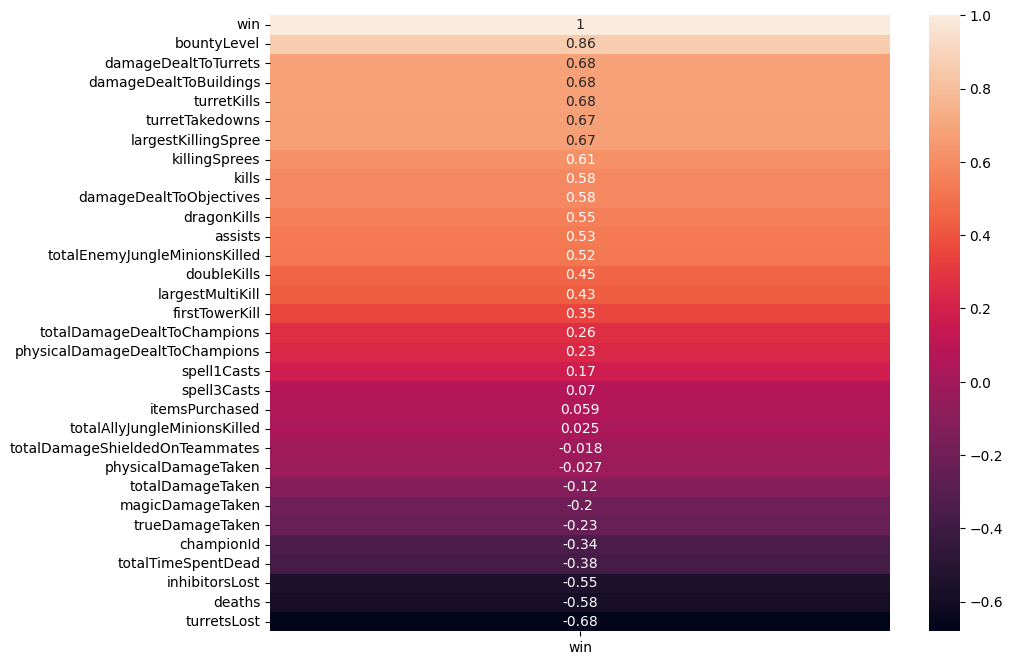

In [95]:
# 새롭게 정제된 x

refined_x = x[selected_columns]

# 상관관계를 보기 위해서 target column을 붙혀주자
refined_gr = pd.concat([refined_x, y], axis = 1)

plt.figure(figsize=(10,8))
sns.heatmap(data = refined_gr.corr(method = 'spearman')[['win']].sort_values(by = 'win', ascending = False), # x가 수치형이고 y가 순서가 있는 범주형이기 때문에 spearman 상관계수를 써주었다
            annot = True)
plt.show()

In [96]:
# 새롭게 정제된 x를 가지고 모델을 돌려보자

refined_x = x[selected_columns]
# 분할
x_train, x_val, y_train, y_val = train_test_split(refined_x, y, test_size = 0.2)

#정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_val_s = scaler.transform(x_val)

# 랜덤 포레스트 모델
model = RandomForestClassifier()

model.fit(x_train_s, y_train)

y_pred = model.predict(x_val_s)

In [97]:
print(cm(y_pred, y_val))
print(cr(y_pred, y_val))

# feature개수 116개 에서 24개로 줄여도 성능 지표에 큰 차이는 나지 않는다..!


[[7 0]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [98]:
# 여기서 feature_importance를 마지막으로 나열해보자
fi_df = pd.DataFrame()
fi_df['column_names'] = refined_x.columns
fi_df['feature_importance'] = model.feature_importances_
fi_df.sort_values(by = 'feature_importance', ascending = False, inplace = True)
fi_df.reset_index(drop = True, inplace = True)

In [99]:
display(fi_df),
display(refined_gr.corr(method = 'spearman')[['win']].sort_values(by = 'win', ascending = False))

column_names  feature_importance
0                      bountyLevel            0.141078
1                      turretsLost            0.120587
2              largestKillingSpree            0.072599
3                  turretTakedowns            0.068738
4             damageDealtToTurrets            0.065733
5           damageDealtToBuildings            0.055807
6                           deaths            0.044010
7    totalEnemyJungleMinionsKilled            0.040064
8                    killingSprees            0.037440
9                      turretKills            0.036052
10         damageDealtToObjectives            0.034712
11                           kills            0.033475
12              totalTimeSpentDead            0.033422
13                  inhibitorsLost            0.027203
14                 trueDamageTaken            0.022621
15  physicalDamageDealtToChampions            0.018163
16                     spell1Casts            0.016345
17                         assists            0.014987
18                      championId            0.013992
19                     spell3Casts            0.013658
20                     doubleKills            0.013362
21                largestMultiKill            0.013051
22                magicDamageTaken            0.011837
23     totalDamageDealtToChampions            0.011225
24                     dragonKills            0.009062
25    totalAllyJungleMinionsKilled            0.007326
26                  itemsPurchased            0.007045
27             physicalDamageTaken            0.006664
28                  firstTowerKill            0.004604
29                totalDamageTaken            0.003577
30  totalDamageShieldedOnTeammates            0.001561

win
win                             1.000000
bountyLevel                     0.859262
damageDealtToTurrets            0.682340
damageDealtToBuildings          0.682340
turretKills                     0.680864
turretTakedowns                 0.674684
largestKillingSpree             0.667343
killingSprees                   0.614374
kills                           0.583748
damageDealtToObjectives         0.580326
dragonKills                     0.549772
assists                         0.528510
totalEnemyJungleMinionsKilled   0.521295
doubleKills                     0.453975
largestMultiKill                0.431984
firstTowerKill                  0.345857
totalDamageDealtToChampions     0.261768
physicalDamageDealtToChampions  0.234822
spell1Casts                     0.174196
spell3Casts                     0.070257
itemsPurchased                  0.058732
totalAllyJungleMinionsKilled    0.025026
totalDamageShieldedOnTeammates -0.018073
physicalDamageTaken            -0.026947
totalDamageTaken               -0.119336
magicDamageTaken               -0.204025
trueDamageTaken                -0.230972
championId                     -0.340693
totalTimeSpentDead             -0.376308
inhibitorsLost                 -0.554312
deaths                         -0.584679
turretsLost                    -0.680673

In [100]:
# 이 지표들이 승패를 결정짓는 가장 중요한 요인들이라는 가정하에 조금 더 자세히 알아보기 위한 단변량 분석을 진행해보겠다

refined_gr.describe()

bountyLevel  largestKillingSpree  turretTakedowns     deaths  \
count    60.000000            60.000000        60.000000  60.000000   
mean      4.850000            10.466667         7.583333  20.016667   
std       5.348293             6.160197         7.656374  11.344366   
min       0.000000             0.000000         0.000000   0.000000   
25%       0.000000             5.000000         1.750000  11.750000   
50%       2.500000            10.000000         4.500000  19.500000   
75%       9.250000            15.000000        12.000000  26.250000   
max      16.000000            23.000000        30.000000  55.000000   

       damageDealtToTurrets  damageDealtToBuildings      kills  turretsLost  \
count             60.000000               60.000000  60.000000    60.000000   
mean           12037.750000            12037.750000  19.950000    19.416667   
std             8382.211161             8382.211161  11.357705    15.733255   
min                0.000000                0.000000   0.000000     0.000000   
25%             5200.250000             5200.250000  11.750000     5.000000   
50%            11111.000000            11111.000000  19.500000    15.000000   
75%            18874.250000            18874.250000  26.250000    31.250000   
max            29771.000000            29771.000000  55.000000    55.000000   

       dragonKills  turretKills  ...  physicalDamageTaken  \
count    60.000000    60.000000  ...            60.000000   
mean      1.516667     3.833333  ...         57607.416667   
std       1.321166     3.070729  ...         25427.935555   
min       0.000000     0.000000  ...           292.000000   
25%       0.000000     1.000000  ...         39664.000000   
50%       1.000000     3.000000  ...         56049.000000   
75%       2.000000     6.250000  ...         74920.750000   
max       5.000000    11.000000  ...        134840.000000   

       totalDamageDealtToChampions  spell1Casts  \
count                    60.000000    60.000000   
mean                  66793.583333   589.350000   
std                   35317.683108   300.024735   
min                     523.000000     2.000000   
25%                   43444.750000   373.750000   
50%                   65743.500000   551.000000   
75%                   88006.000000   793.750000   
max                  184875.000000  1449.000000   

       totalDamageShieldedOnTeammates  itemsPurchased  spell3Casts  \
count                       60.000000       60.000000    60.000000   
mean                       897.633333       97.800000   265.850000   
std                       1607.509253       29.815705   147.725562   
min                          0.000000       12.000000     1.000000   
25%                          0.000000       80.000000   162.000000   
50%                        242.000000       96.500000   256.500000   
75%                        845.500000      118.250000   330.500000   
max                       7110.000000      160.000000   792.000000   

       doubleKills  firstTowerKill  magicDamageTaken        win  
count    60.000000       60.000000         60.000000  60.000000  
mean      1.833333        0.366667      29454.966667   0.500000  
std       1.814879        0.485961      16741.964326   0.504219  
min       0.000000        0.000000        187.000000   0.000000  
25%       0.000000        0.000000      18460.000000   0.000000  
50%       1.000000        0.000000      28733.500000   0.500000  
75%       3.000000        1.000000      37589.000000   1.000000  
max       7.000000        1.000000      74502.000000   1.000000  

[8 rows x 32 columns]

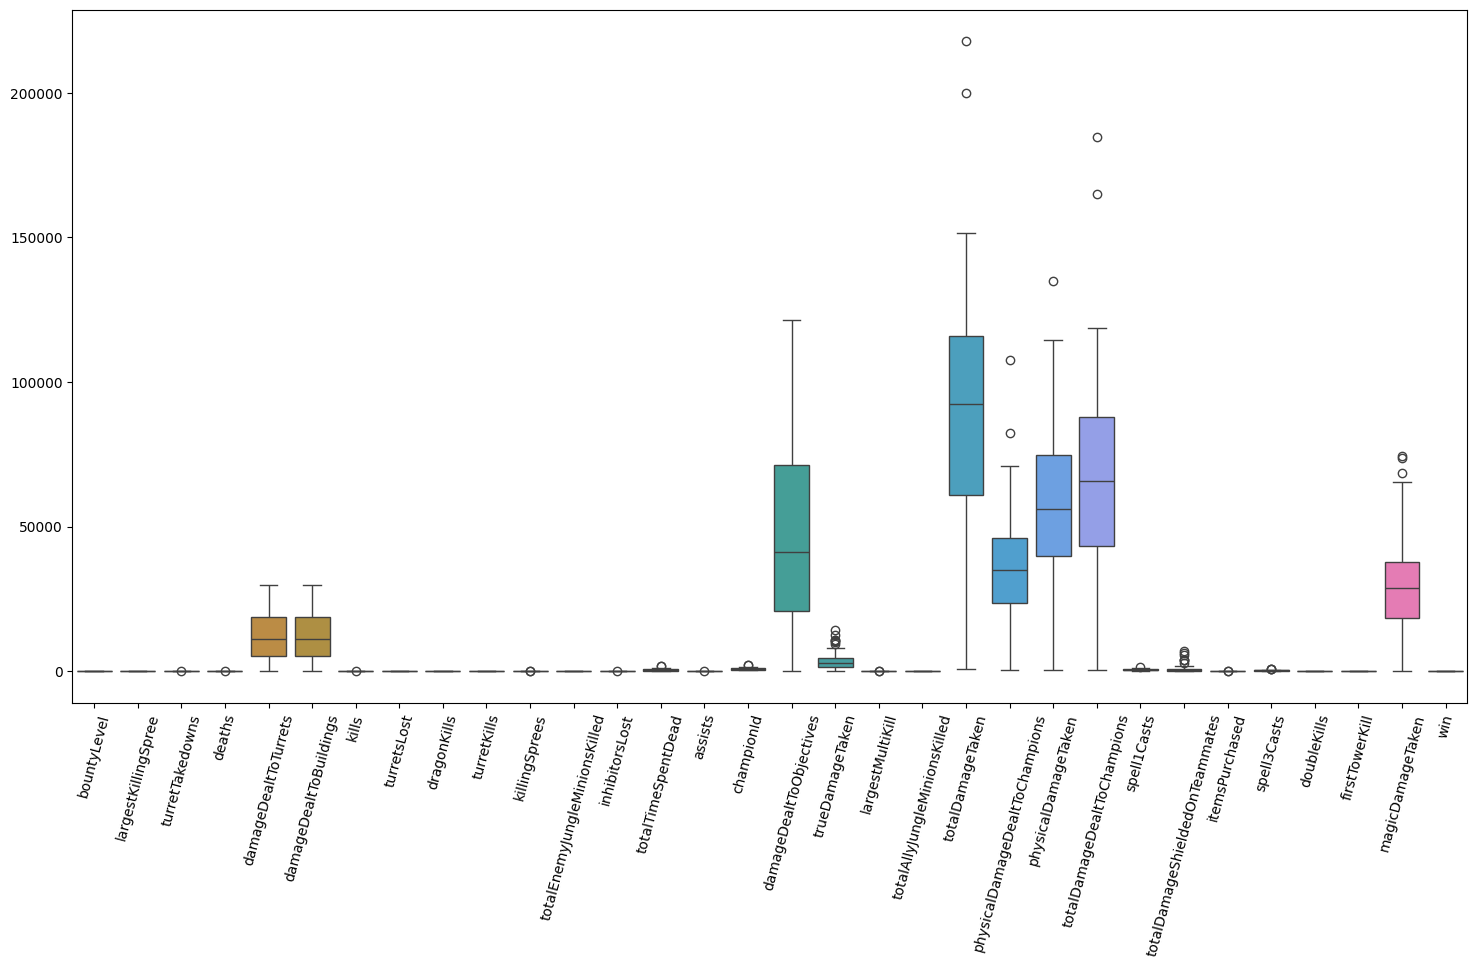

In [101]:
# 데이터 분포 파악
# 데미지와 골드를 제외하면 대부분 적은 수치이다
plt.figure(figsize = (18, 9))
sns.boxplot(data = refined_gr)
plt.xticks(rotation = 75)
plt.show()

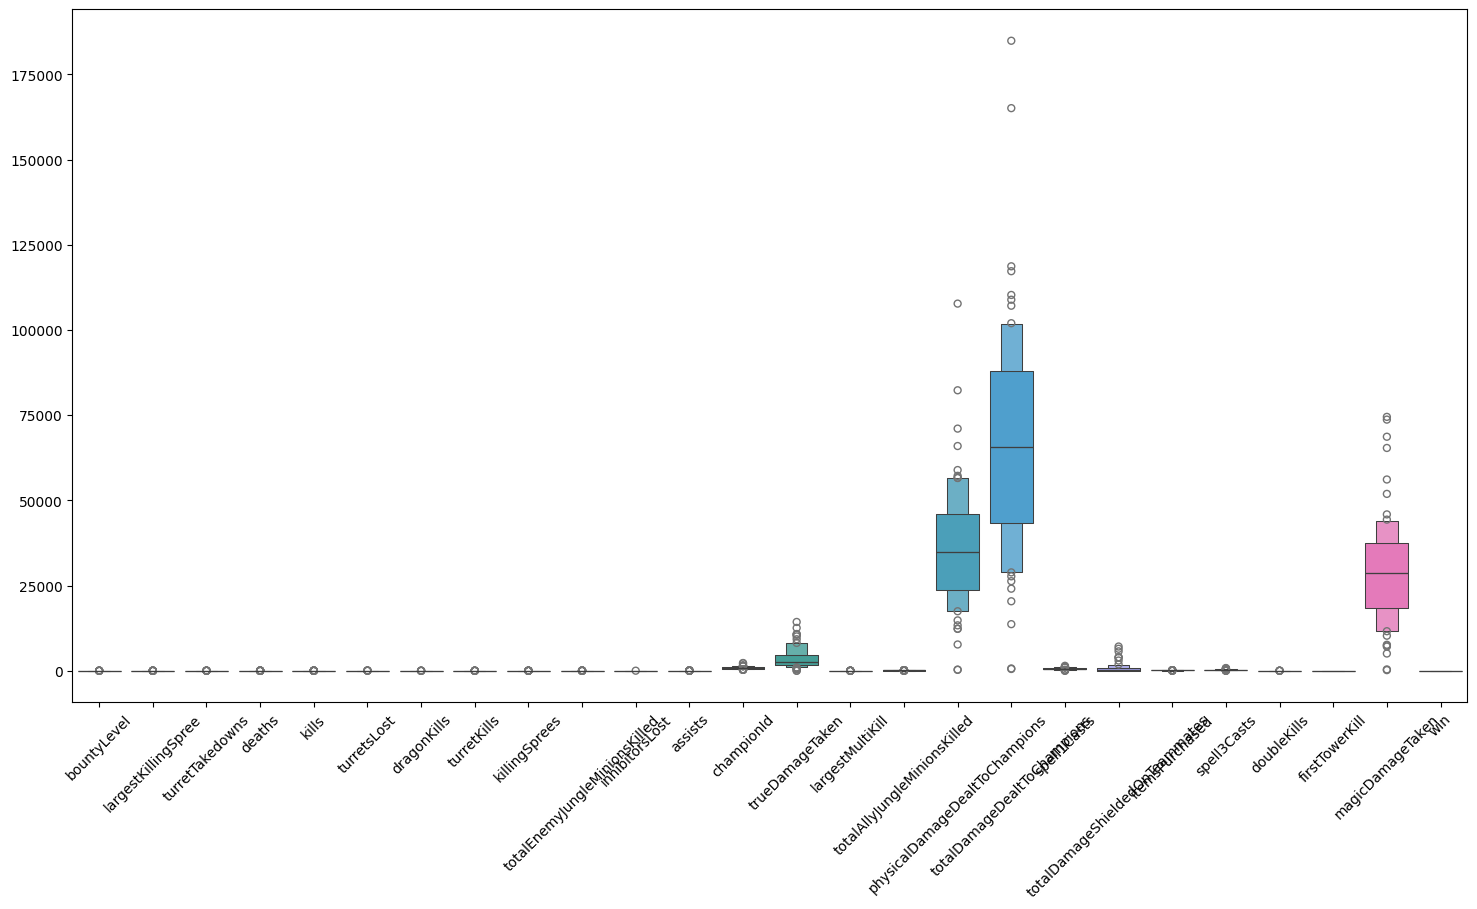

In [103]:
removed_columns = ['damageDealtToTurrets', 'damageDealtToObjectives', 'damageDealtToBuildings', 'totalDamageTaken', 'physicalDamageTaken', 'totalTimeSpentDead']
plt.figure(figsize = (18, 9))
sns.boxenplot(data = refined_gr.drop(removed_columns, axis = 1))
plt.xticks(rotation = 45)
plt.show()

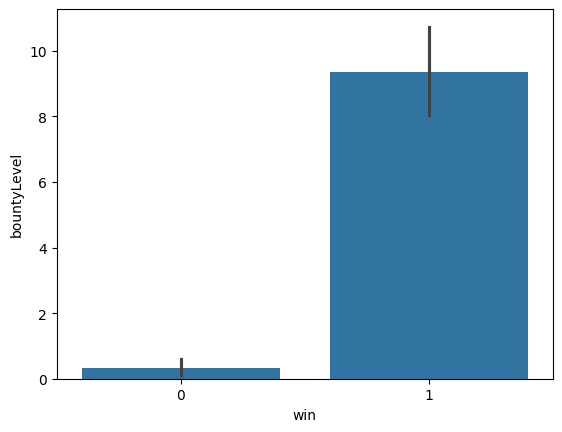

In [104]:
# 실제로 상관관계와 feature_importance에서 높은 상관관계와 점수를 보여준 bountyLevel 부터 한번 보자
# 이기는 팀의 경우 5명의 총 현상금 레벨이 8~10 정도 되고, 지는 팀의 경우 현상금 레벨이 0이다
sns.barplot(data = refined_gr, y = 'bountyLevel', x = 'win')
plt.show()

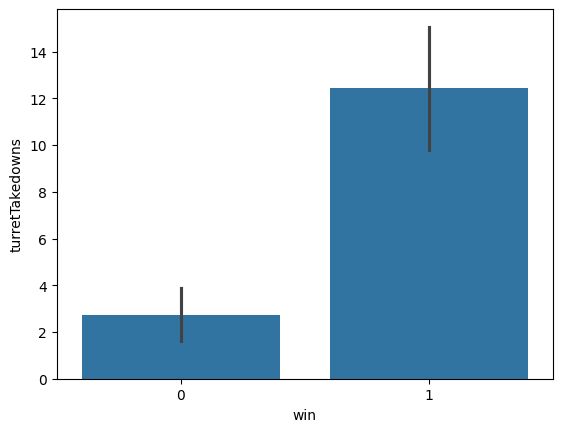

In [105]:
# 이기는 팀의 경우 타워를 2 ~ 4개를 부수고, 이기는 팀의 경우 13 ~ 16
## 음? 하지만 팀 당 보유하고 있는 최대 타워의 개수는 11개인데? 아지르 같은 경우를 제외하면...
## 15가 평균이 나올 수가 없는데..?
sns.barplot(data = refined_gr, x = 'win', y = 'turretTakedowns')
plt.show()

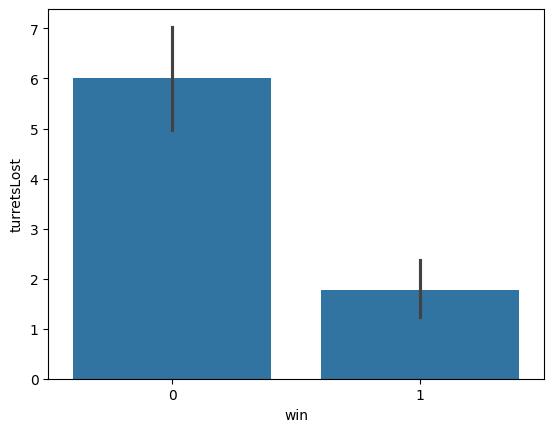

In [106]:
# 지는 팀의 경우 11개중 7~8개의 타워가 부숴지는 경우가 많고
# 이기는 팀의 경우 2~3개 정도만 부서지는 경우가 많다
sns.barplot(x = refined_gr['win'], y = refined_gr['turretsLost']/5)
plt.show()

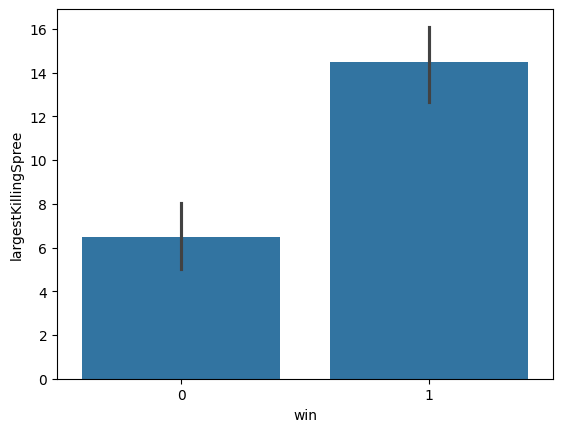

In [107]:
sns.barplot(data = refined_gr, x = 'win', y = 'largestKillingSpree')
plt.show()

In [109]:
y_list = refined_gr.drop('win', axis = 1).columns.tolist()

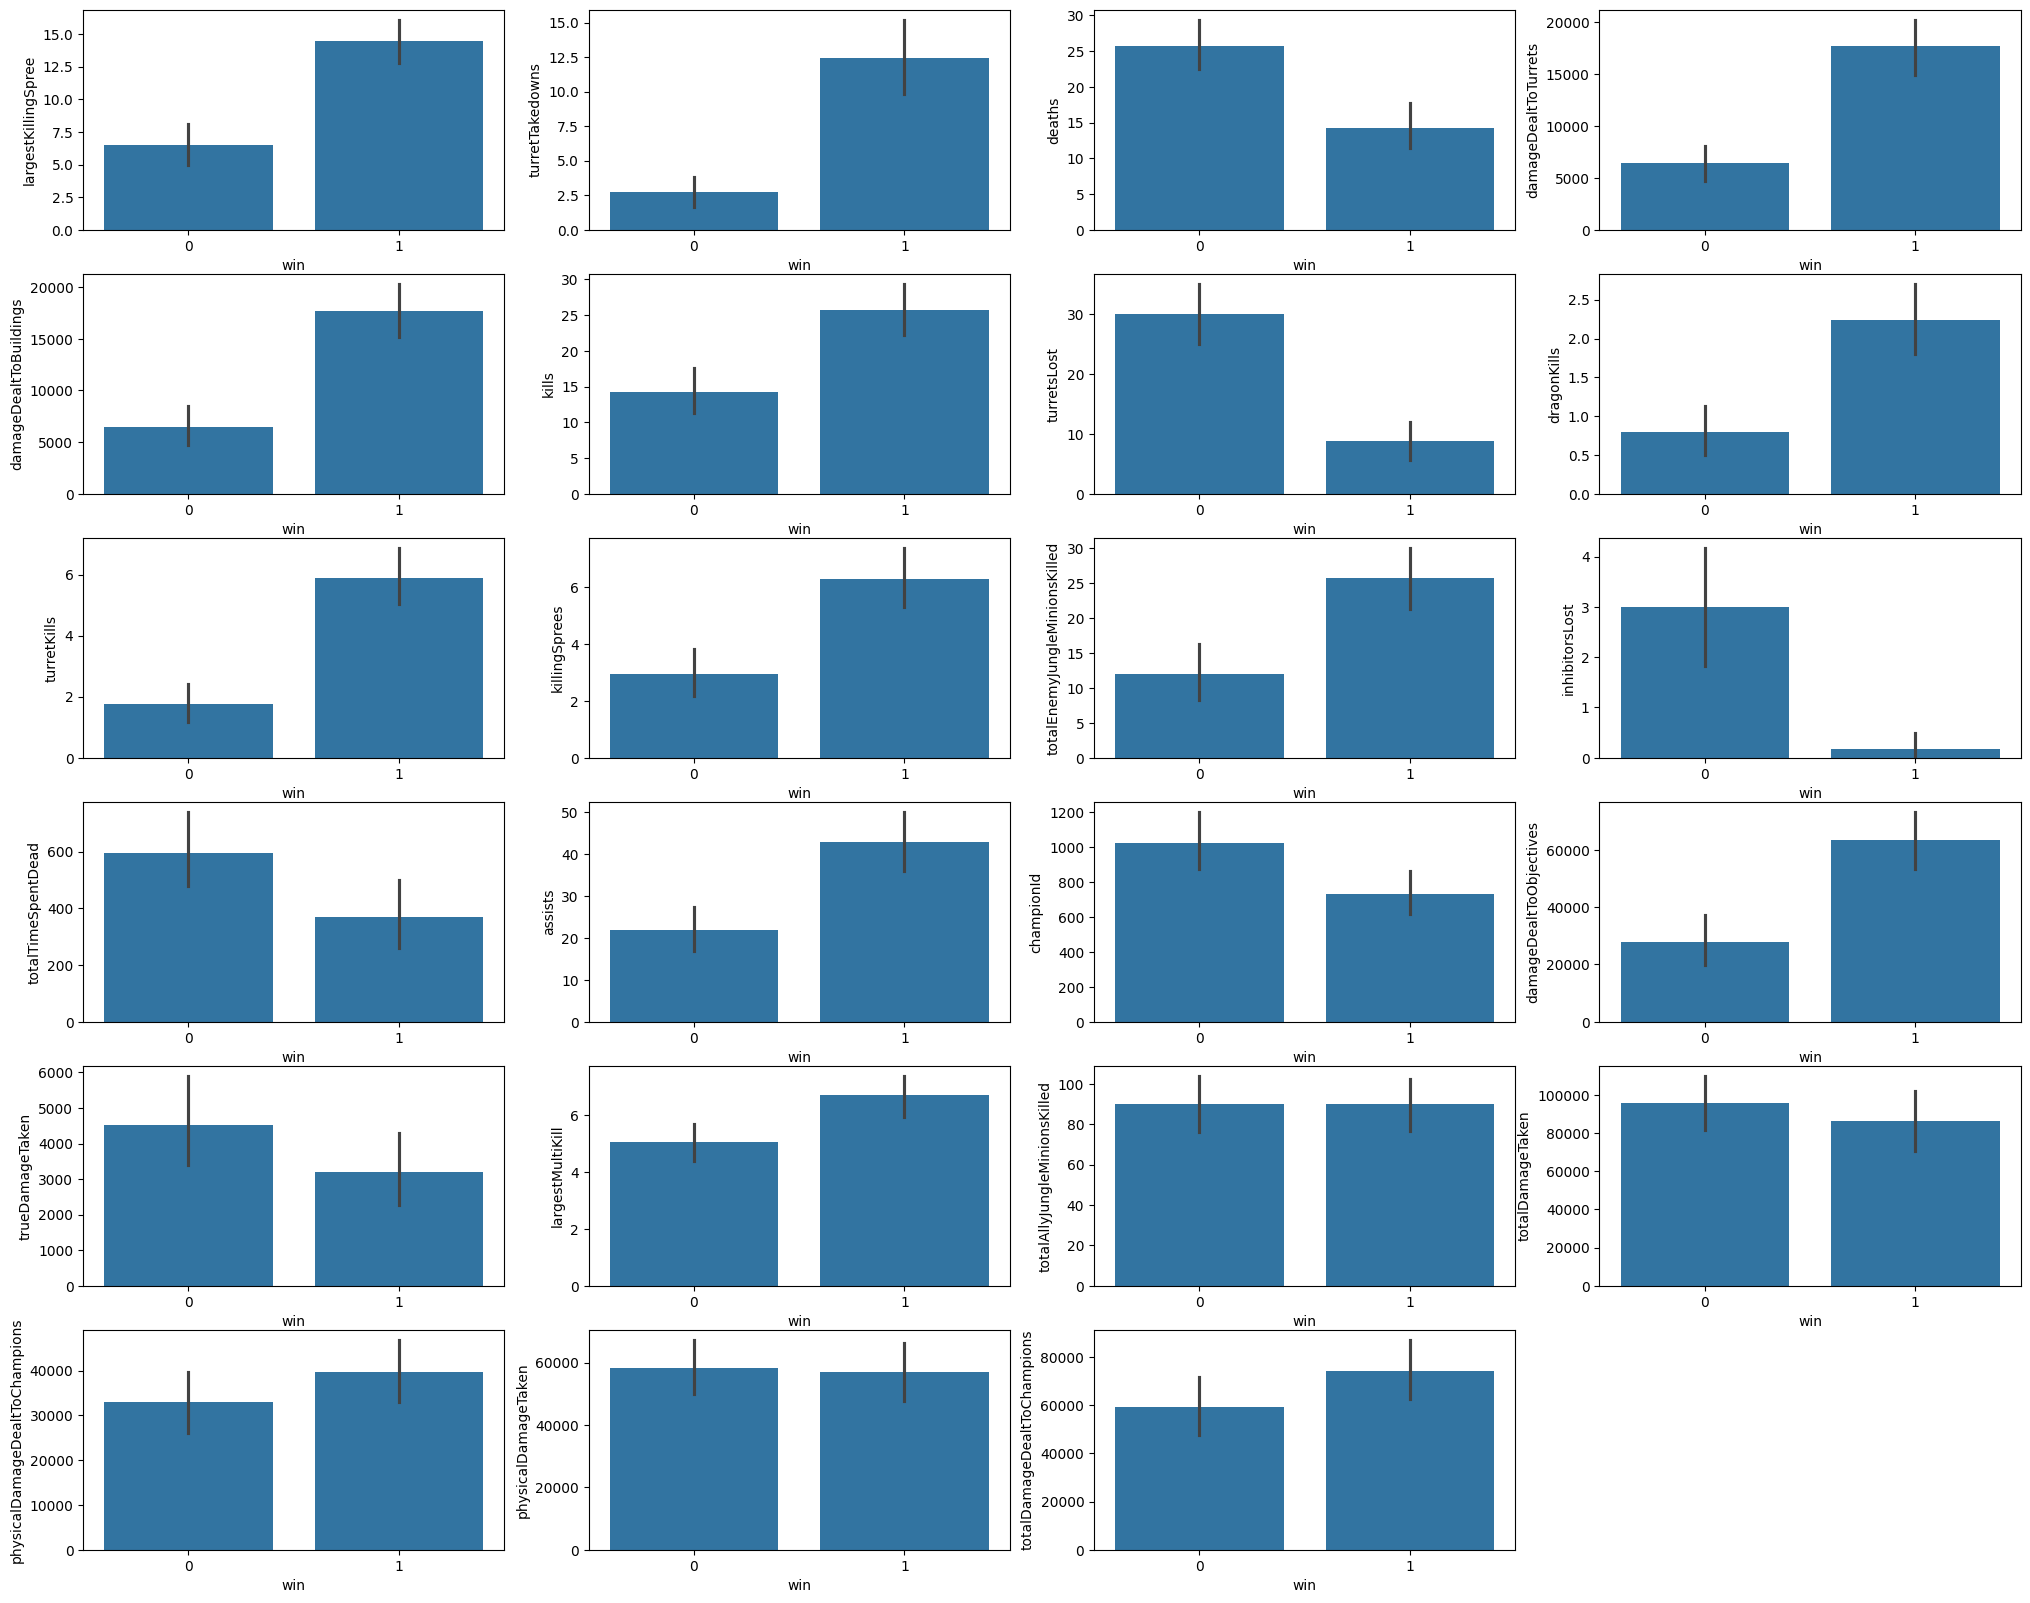

In [110]:
# 내가 가지고있는 도메인 지식과 얼추 비슷한 느낌이다
# 더 확실히 알아보자
plt.figure(figsize = (25,20))
for i in range(1, 24):
    plt.subplot(6, 4, i)
    sns.barplot(data = refined_gr, x = 'win', y = y_list[i])
plt.show()

In [111]:
pd.options.display.max_columns = None
grouped_df = refined_gr.groupby('win', as_index = False).sum()

In [112]:
grouped_df

win  bountyLevel  largestKillingSpree  turretTakedowns  deaths  \
0    0           10                  194               82     772   
1    1          281                  434              373     429   

   damageDealtToTurrets  damageDealtToBuildings  kills  turretsLost  \
0                192461                  192461    427          900   
1                529804                  529804    770          265   

   dragonKills  turretKills  killingSprees  totalEnemyJungleMinionsKilled  \
0           24           53             88                            360   
1           67          177            189                            770   

   inhibitorsLost  totalTimeSpentDead  assists  championId  \
0              90               17862      657       30702   
1               5               11138     1284       21864   

   damageDealtToObjectives  trueDamageTaken  largestMultiKill  \
0                   830001           135753               152   
1                  1901752            96278               201   

   totalAllyJungleMinionsKilled  totalDamageTaken  \
0                          2695           2866730   
1                          2701           2589311   

   physicalDamageDealtToChampions  physicalDamageTaken  \
0                          986642              1747844   
1                         1188911              1708601   

   totalDamageDealtToChampions  spell1Casts  totalDamageShieldedOnTeammates  \
0                      1775635        16319                           25831   
1                      2231980        19042                           28027   

   itemsPurchased  spell3Casts  doubleKills  firstTowerKill  magicDamageTaken  
0            2881         7533           31               6            982991  
1            2987         8418           79              16            784307

In [113]:
print(grouped_df.columns[grouped_df.loc[0] > grouped_df.loc[1]].tolist())
print(grouped_df.columns[grouped_df.loc[0] < grouped_df.loc[1]].tolist())

['deaths', 'turretsLost', 'inhibitorsLost', 'totalTimeSpentDead', 'championId', 'trueDamageTaken', 'totalDamageTaken', 'physicalDamageTaken', 'magicDamageTaken']
['win', 'bountyLevel', 'largestKillingSpree', 'turretTakedowns', 'damageDealtToTurrets', 'damageDealtToBuildings', 'kills', 'dragonKills', 'turretKills', 'killingSprees', 'totalEnemyJungleMinionsKilled', 'assists', 'damageDealtToObjectives', 'largestMultiKill', 'totalAllyJungleMinionsKilled', 'physicalDamageDealtToChampions', 'totalDamageDealtToChampions', 'spell1Casts', 'totalDamageShieldedOnTeammates', 'itemsPurchased', 'spell3Casts', 'doubleKills', 'firstTowerKill']


In [114]:
# 데이터의 결과가 너무 뻔하다...
# 만들어준 게임 데이터에서 상관관계와 feature_importance 모두에서 최고로 높은 연관성을 보이는 bountyLevel에 대해서 분석을 해보겠다

corr = pd.DataFrame(final_game_result.corr(method = 'spearman'))['bountyLevel'].sort_values(ascending = False)
corr
# 현상금 레벨이 승리와 가장큰 상관관계를 보이는 이유에 대해서 한번 생각해볼 필요가 있다.

bountyLevel                       1.000000
win                               0.859262
largestKillingSpree               0.618042
turretTakedowns                   0.612064
turretKills                       0.600822
damageDealtToBuildings            0.596929
damageDealtToTurrets              0.596929
killingSprees                     0.581802
damageDealtToObjectives           0.537854
dragonKills                       0.524709
inhibitorKills                    0.524272
inhibitorTakedowns                0.523578
totalEnemyJungleMinionsKilled     0.522150
kills                             0.519918
assists                           0.458991
nexusKills                        0.386055
nexusTakedowns                    0.384826
doubleKills                       0.380793
largestMultiKill                  0.355834
firstTowerKill                    0.334717
neutralMinionsKilled              0.303420
firstTowerAssist                  0.294054
goldEarned                        0.259642
trueDamageD